# **Phase 2 Project** 

  #### GROUP 6
  1. PAUL NGATIA
  2. HARRY ATULAH
  3. PASCALIA MAIGA
  4. RONNY KABIRU 

# Business Understanding
  ## Overview
Primetime Realtors situated in the heart of a North Western County acts as the conduit for transforming homeownership aspirations into tangible realities. Committed to unwavering excellence and employing data-driven methodologies, the agency aspires to lead the way in achieving optimal pricing and facilitating successful real estate endeavors. Its overarching objective is to surpass traditional limitations by leveraging technology and analytical insights to revolutionize the real estate landscape as we perceive it.
  ## Business Problem 
  The housing market in King County displays diverse trends and influences on property prices. Yet, a more thorough understanding of these factors is necessary to assist real estate stakeholders in making informed choices. The main challenge is to construct a reliable pricing model capable of accurately forecasting house prices using multiple features. This model should offer insights into the most influential features on property prices, empowering Primetime Realtors make well-informed decisions.
  ## Objectives
- To identify key features that significantly influence house prices in the northwestern county.
- To develop an optimal pricing strategy using a robust multiple linear regression model.
- To help improve the agency's annual revenue by leveraging the analytical insights and pricing strategy developed through this project.



In [1]:
##!pip3 install -U scikit-learn

## Importing the Data

In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import warnings
%matplotlib inline
sns.set_style('dark')
warnings.filterwarnings('ignore')
data = pd.read_csv('data/kc_house_data.csv')

data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Loading  the Data Into a Data Frame

In [3]:
df = pd.read_csv("data/kc_house_data.csv")

## Data Understanding & Preparation
Here we will explore the data to get a better understanding of its state, then decide on the steps we need to take to clean it. We will begin by defining some functions for the following tasks:
- getting the shape of the data
- getting data info
- simple check for missing data
- duplicates
- descriptive stats

We will then group together the helper function under a new function that explores the data for the above attributes. 

In [4]:
# function for shape of the data 

def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')

    return out

In [5]:
# function for info of the data 

def data_info(data):
    """Simple function to provide the info of the data"""
    out = print(data.info(), '\n')
    
    return out

In [6]:
# function to check for missing values

def data_missing(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values", '\n')
    else:
        out = print(f"The Data has missing values.", '\n')

    return out

In [7]:
# function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [8]:
# function to check for duplicates on the ID column

def unique_column_duplicates(data, column):
    """handling duplicates in unique column"""
    # empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        out = print(f"The column {column.title()} has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [9]:
# helper function to check for descriptive stats

def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    out = print(data.describe(), '\n')
    
    return out

In [10]:
# overall function for data understanding

def explore(data):
    """Group of functions to explore data """
    out1 = data_shape(data)
    out2 = data_info(data)
    out3 = data_missing(data)
    out4 = identify_duplicates(data)
    out5 = unique_column_duplicates(data, 'id')
    out6 = data_describe(data)
    
    return out1, out2, out3, out4, out5

From below, data has:
- 21597 houses sold
- 21 house features : 6 string variables and 15 numeric variables. `date` column is encoded as string instead of datetime, while `sqft_basement` is enconded as string instead of float. These 2 will be corrected
- Missing values which will be investigated and treated
- No duplicates. However, the `id` column which should contain unique identifiers has 177 duplicated values. These will be checked
- From the descriptive stats, there's also potential for some outliers which will need to be veried. 

#### Duplicated Id Column
Id column duplicates to be dropped in the process below

In [11]:
print(identify_duplicates(data))
print(unique_column_duplicates(data, 'id')) 

The Data has no duplicates 

None
The column Id has 177 duplicated rows.
This constitutes 0.82% of the data set. 

None


In [12]:
def drop_duplicates(df, column):
    """function to drop duplicated rows"""
    
    df.drop_duplicates(subset=column, keep='first', inplace=True)
    confirmation = unique_column_duplicates(data, 'id')
    return confirmation

drop_duplicates(data, 'id') 

The column Id has no duplicates 



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Our data has 6 variables as objects i.e Date, waterfront,view, condition, grade,sqft_basement

### Dealing with the Missing Values

In [14]:
# Find the percentage of missing values in each column
percantage_msng_values = df.isnull().sum()* 100 / len (df)

print(percantage_msng_values.round(2))

id                0.00
date              0.00
price             0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64


Our data frame has some missing values in waterfront, view and year renovated columns constituting to 11%, 0.29% and 17.79% respectively.

In [15]:
# look for unique values in the "waterfront" column
unique_values_wf = df['waterfront'].unique()

print(unique_values_wf)

[nan 'NO' 'YES']


In [16]:
# look for total number of houses where 'waterfront' is 'yes'
total_waterfront_yes = len(df[df['waterfront'] == 'YES'])

# Print the total number
print("Total number of houses where 'waterfront' is 'YES':", total_waterfront_yes)

Total number of houses where 'waterfront' is 'YES': 146


In [17]:
# Replace null values in 'waterfront' with 'NO'
df['waterfront'].fillna('NO', inplace=True)

The waterfront columns contain nan, No and Yes unique values. We decided to fill nan entries with No on assumption that these houses lacked a waterfront and hence entries made as nan

In [18]:
# look unique values in the view column
unique_values_view = df['view'].unique()

print(unique_values_view)

['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [19]:
# search for how many houses have null values under the 'view' column
null_values_view = df['view'].isnull().sum()

# Print the total number
print("Total number of houses with null values under the 'view' column:", null_values_view)

Total number of houses with null values under the 'view' column: 63


In [20]:
#find out how many houses with no view
total_view_none = len(df[df['view'] == 'NONE'])

# Print the total number
print("Total number of houses where 'view' is 'NONE':", total_view_none)

Total number of houses where 'view' is 'NONE': 19422


In [21]:
# Replace NaN values in the 'view' column with 'NONE'
df['view'].fillna('NONE', inplace=True)

The view columns consist of various unique values such as 'NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', and 'FAIR'. There are a total of 63 entries marked as 'nan'. After careful consideration, we opted to replace these 'nan' entries with 'NONE', under the assumption that these particular houses do not possess a view of notable quality.

In [22]:
# checking unique values in the the yr_renovated column
unique_values_renovation = df['yr_renovated'].unique()
unique_values_renovation.sort()

print(unique_values_renovation) 

[   0. 1934. 1940. 1944. 1945. 1946. 1948. 1950. 1951. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1962. 1963. 1964. 1965. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


In [23]:
# Checking the number of houses with 'yr_renovated' greater than 0 
houses_with_renovations = df[df['yr_renovated'] > 0]

# Print the number of houses with 'yr_renovated' greater than 0
print("\nNumber of houses with 'yr_renovated' greater than 0:", len(houses_with_renovations)) 


Number of houses with 'yr_renovated' greater than 0: 744


In [24]:
# Replace null values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True) 

The yr_renovated column contains years ranging from 1934 to 2015, but it also includes entries with the values 0 and 'nan'. We inferred that these entries represent houses that have never undergone renovation. Subsequently, we replaced the 'nan' entries with 0 to reflect this assumption.

In [25]:
# Checking the condition column
unique_values_condition = df['condition'].unique()

print(unique_values_condition) 

['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [26]:
# Checking the grade column
unique_values_grade = df['grade'].unique()

# Sorting the unique values in ascending order
unique_values_grade.sort()

print(unique_values_grade) 

['10 Very Good' '11 Excellent' '12 Luxury' '13 Mansion' '3 Poor' '4 Low'
 '5 Fair' '6 Low Average' '7 Average' '8 Good' '9 Better']


In [27]:
missing_values_percent = df.isnull().sum() * 100 / len(df)

print(missing_values_percent) 

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64


Our data has been thoroughly cleaned, and there are no longer any missing values present.

In [28]:
# Check the 'sqft_basement' column
df['sqft_basement'].head(8) 

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
Name: sqft_basement, dtype: object

In [29]:
# check number of '?' in 'sqft_basement' column
count_question_marks = df['sqft_basement'].str.count('\?').sum()

# Calculate the percentage of '?' in 'sqft_basement' column
percentage_question_marks = (count_question_marks / len(df['sqft_basement'])) * 100

print("Number of '?' in 'sqft_basement' column:", count_question_marks)
print("Percentage of '?' in 'sqft_basement' column:", percentage_question_marks.round(2))

Number of '?' in 'sqft_basement' column: 454
Percentage of '?' in 'sqft_basement' column: 2.1


In [30]:
# Drop rows with '?' in the 'sqft_basement' column
df = df[df['sqft_basement'] != '?']

# Convert the 'sqft_basement' column to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [31]:
# Remove duplicates in 'df' in place
df.drop_duplicates(inplace=True) 

### Data Conversion
Conversion of various expected features to the correct data types

In [32]:
# Convert the 'year_renovated' column to integers
df['yr_renovated'] = df['yr_renovated'].astype(int) 

In [33]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y') 

In [34]:
#9. Convert View, condition and grade into representative numbers for easier Exploratory analysis.
df['view'] = df['view'].map({'NONE': 1,'FAIR': 2,'AVERAGE': 3,'GOOD': 4,'EXCELLENT': 5}).astype(float)
df['condition'] = df['condition'].map({'Poor': 1,'Fair': 2,'Average': 3,'Good': 4,'Very Good': 5}).astype(float)
df['grade'] = df['grade'].map({'3 Poor': 1,'4 Low': 2,'5 Fair': 3,'6 Low Average': 4,'7 Average': 5,'8 Good': 6,'9 Better': 7,'10 Very Good': 8,'11 Excellent': 9,'12 Luxury': 10,'13 Mansion': 11}).astype(float) 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21143 non-null  int64         
 1   date           21143 non-null  datetime64[ns]
 2   price          21143 non-null  float64       
 3   bedrooms       21143 non-null  int64         
 4   bathrooms      21143 non-null  float64       
 5   sqft_living    21143 non-null  int64         
 6   sqft_lot       21143 non-null  int64         
 7   floors         21143 non-null  float64       
 8   waterfront     21143 non-null  object        
 9   view           21143 non-null  float64       
 10  condition      21143 non-null  float64       
 11  grade          21143 non-null  float64       
 12  sqft_above     21143 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21143 non-null  int64         
 15  yr_renovated   2114

In [36]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,1.0,...,5.0,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,1.0,...,5.0,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,1.0,...,4.0,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,1.0,...,5.0,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,1.0,...,6.0,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

### Raw Price Distribution

### Raw Price Distribution


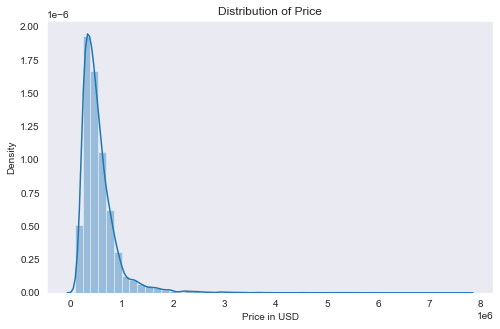

In [37]:
# View price distribution
plt.figure(figsize=(8,5))
dist=sns.distplot(df["price"])
dist.set_title("Price distribution")
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

The distribution is positively skewed, meaning that the mean is much greater than the median which should not be the case for a normal distribution.
We have to normalize the distribution.

### Normalized Price Distribution

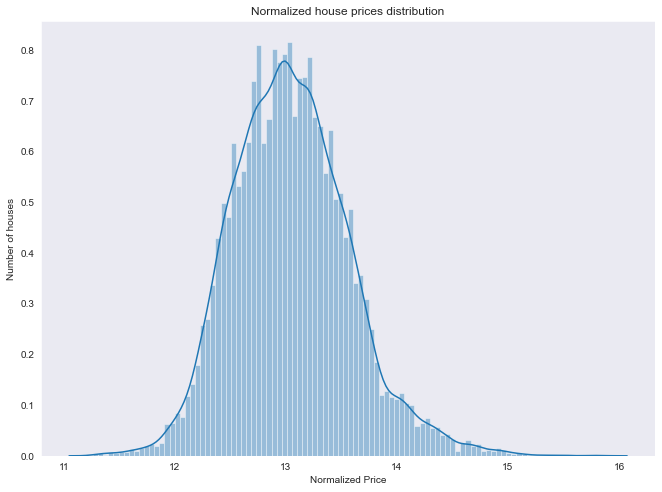

In [38]:
#Normalizing Price Distribution
fig, ax = plt.subplots(figsize=(11, 8))

sns.distplot(np.log(df['price']), bins = 100) 

ax.set_xlabel("Normalized Price")
ax.set_ylabel("Number of houses")
ax.set_title("Normalized house prices distribution")
plt.show()

The distribution above now assumes an inverted bell shape. We have normalized the distribution and the mean and median now fall in a central range of the data points.

## `How do different features influence house pricing?`

### *Landscape Features*

The landscape feature is the waterfront.
#### Waterfront

In [39]:
total_waterfront_yes

146

*Most properties do not have a waterfront. Only 146 do.*

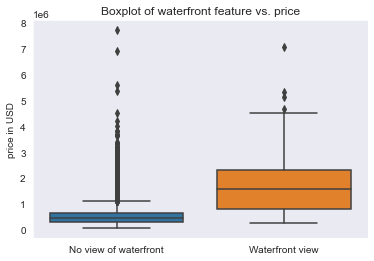

In [40]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No view of waterfront', 'Waterfront view'))
plt.show()

In [41]:
waterfront_mean = df[df['waterfront'] == 'YES']['price'].mean()
no_waterfront_mean = df[df['waterfront'] == 'NO']['price'].mean()
print(f"The mean  price for a house with a waterfront  is  {round(waterfront_mean,2)} USD")
print(f"The mean  price for a house without a waterfront is  {round(no_waterfront_mean,2)} USD")
print(f"Percentage of houses with waterfront is: {len(df[df['waterfront'] == 'YES'])/len(df)*100}")

The mean  price for a house with a waterfront  is  1731020.07 USD
The mean  price for a house without a waterfront is  532461.0 USD
Percentage of houses with waterfront is: 0.6716170836683536


In [42]:
# Mean Price Ratio of Houses with Waterfront : Houses without Waterfront
mpr_waterfront = waterfront_mean / no_waterfront_mean
print(f'Waterfront : No Waterfront = ',round(mpr_waterfront, 2),': 1')

Waterfront : No Waterfront =  3.25 : 1


#### Waterfront Feature Conclusion
Houses with waterfronts are significantly more pricy than those without. Those with waterfront are more than 3 times the price of those without waterfronts. However, only 0.67% of the properties have the waterfront feature.

### *House Features*

In [43]:
#Isolation of house features from the dataframe
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

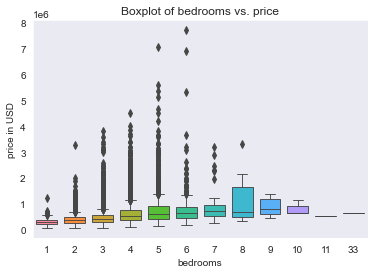

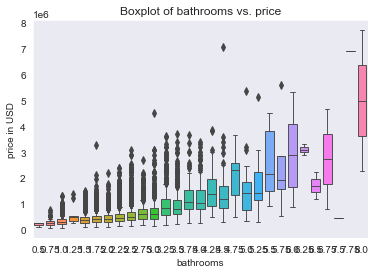

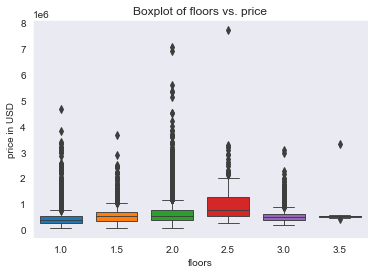

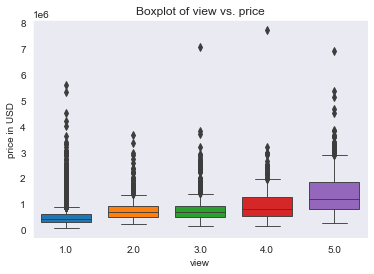

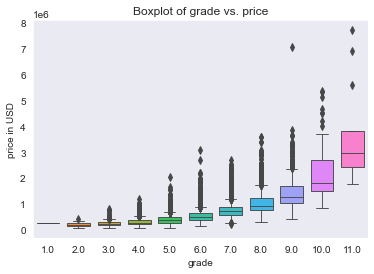

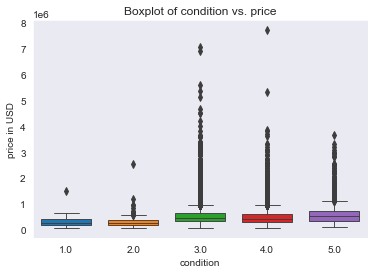

In [44]:
# categorical variables
features = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'condition']

#We are not using 'yr_built' and 'yr_renovated' due to many outliers and similar results across their distribution

# plot boxplots
for feature in features:
    sns.boxplot(x = df[feature], y = df['price'], whis=1.0, width=0.75, linewidth=0.9, saturation=1.0)
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

### Bedrooms vs Price
Price increases with increase in number of bedrooms. 8 bedroom houses are the most preferred.

### Bathrooms vs Price
Price generally increases with increase in number of bathrooms but it is not the case in all instances.

### Floors vs Price
Price increases with increase in number of floors upto 2.5 floors. After 2.5 floors, prices begin to drop. Most people settle for 2.5 floors.

### View vs Price
Price increases with increase in quality of view with 5(Excellent) being the most expensive and most purchased.

### Grade vs Price
Price increases with increase in grade. The highest grade(11) is the most expensive and most purchased.

### Condition vs Price
Trend cannot be accurately determined as houses in Poor condition are more pricy than houses in Very Good condition.


#### Heatmap

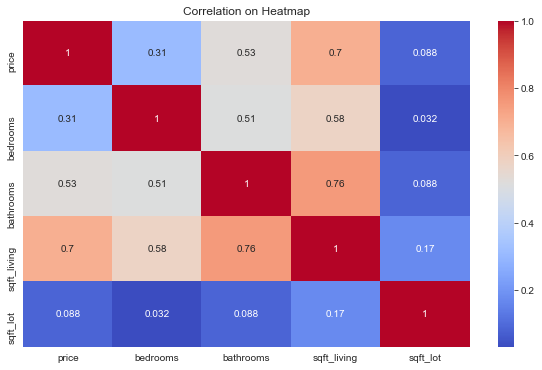

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation on Heatmap')
plt.show()

The correlation heatmap depicting the relationships between price and various features like bedrooms, bathrooms, sqft_living, and sqft_lot holds significant importance in both linear and multilinear regression analyses. It serves to highlight influential predictors by showcasing their connections with the target variable (price). This aids in prioritizing predictors within linear models and identifying multicollinearity within multilinear models, thereby ensuring the stability and comprehensibility of the models. In essence, the heatmap serves as a guide for feature selection and model interpretation in regression analysis. This is the heatmap

#### Bar Graph

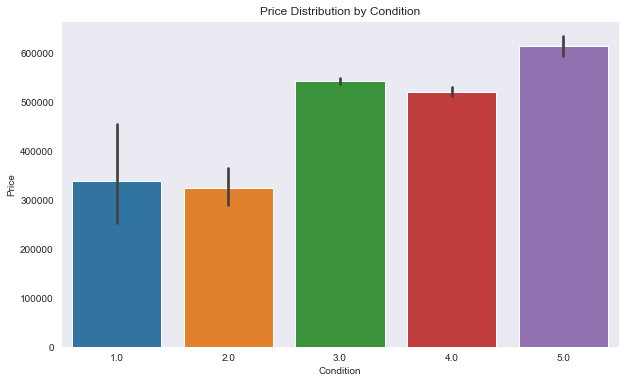

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='condition', y='price', data=df)
plt.title('Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()


The bar plot of price by condition is essential for developing regression models. It identifies influential condition categories for predictor selection and aids in understanding price variations. This visualization guides preprocessing of categorical variables and validates predictor-target relationships. Overall, it informs feature selection, interpretation, and validation in regression modeling.

#### Scatter Plot

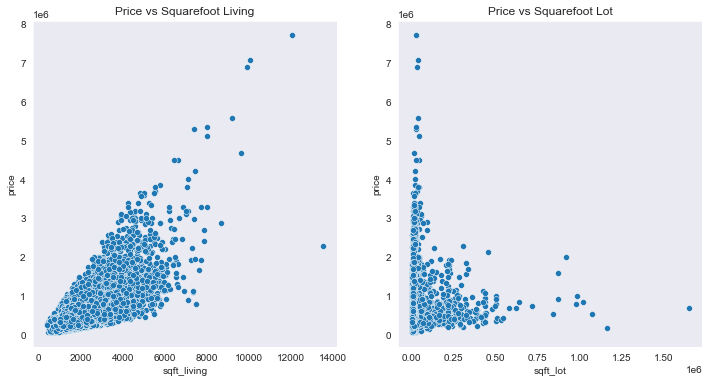

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs Squarefoot Living')
plt.subplot(1, 2, 2)
sns.scatterplot(x='sqft_lot', y='price', data=df)
plt.title('Price vs Squarefoot Lot')
plt.show()

The scatter plots of price against square footage of living space (`sqft_living`) and lot size (`sqft_lot`) provide insights for linear and multilinear regression models. They show how price relates to these predictors, helping assess linearity and identify outliers. Clear trends in these plots guide decisions on model complexity and feature engineering, essential for accurate regression analysis.

## MODELLING

#### Linear Regression

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Defining features (X) and target variable (y)
X = df[['sqft_living']]
y = df['price']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build baseline linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predictions
baseline_train_pred = baseline_model.predict(X_train)
baseline_test_pred = baseline_model.predict(X_test)

# MSE
baseline_train_mse = mean_squared_error(y_train, baseline_train_pred)
baseline_test_mse = mean_squared_error(y_test, baseline_test_pred)

# RMSE
baseline_train_rmse = mean_squared_error(y_train, baseline_train_pred, squared=False)
baseline_test_rmse = mean_squared_error(y_test, baseline_test_pred, squared=False)

# R-squared
baseline_train_r2 = r2_score(y_train, baseline_train_pred)
baseline_test_r2 = r2_score(y_test, baseline_test_pred)

print("Baseline Model Performance:")
print("Train RMSE:", baseline_train_rmse)
print("Test RMSE:", baseline_test_rmse)
print("Train MSE:", baseline_train_mse)
print("Test MSE:", baseline_test_mse)
print("Train R-squared:", baseline_train_r2)
print("Test R-squared:", baseline_test_r2)


Baseline Model Performance:
Train RMSE: 261631.4910742736
Test RMSE: 263524.60505394044
Train MSE: 68451037121.74771
Test MSE: 69445217468.8353
Train R-squared: 0.49807283088908505
Test R-squared: 0.4733338519535445


The baseline linear regression model exhibits moderate performance in predicting house prices based solely on square footage of living area. With a training RMSE of approximately $261,631.49 and a test RMSE of approximately $263,524.61, the model's predictions are reasonably close to the actual prices, indicating generalizability to unseen data. However, the model's explanatory power is limited, as evidenced by the training and test R-squared values of approximately 0.498 and 0.473, respectively. Further refinement and feature engineering may be necessary to improve the model's accuracy and capture more nuances in house price prediction.

In [49]:
# Add a constant term to the predictor variable for the intercept
X_train_with_const = sm.add_constant(X_train)
# Fit the linear regression model
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()
# Displaying the summary table of regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                 1.678e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        13:54:00   Log-Likelihood:            -2.3500e+05
No. Observations:               16914   AIC:                         4.700e+05
Df Residuals:                   16912   BIC:                         4.700e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -4.66e+04   4959.944     -9.395      

This linear regression model predicts house prices based on square footage of living area. The model indicates that, on average, each additional square foot of living area is associated with an increase in price of approximately $282.36. The intercept term suggests that the price of a house with zero square feet of living area (which is not practically meaningful) is approximately -$46,600. The model explains about 49.8% of the variance in house prices, as indicated by the R-squared value. Additionally, the F-statistic suggests that the overall model is statistically significant. However, the large condition number and the presence of strong skewness and kurtosis in the residuals indicate potential issues with the model's assumptions and potential for multicollinearity or other numerical problems.

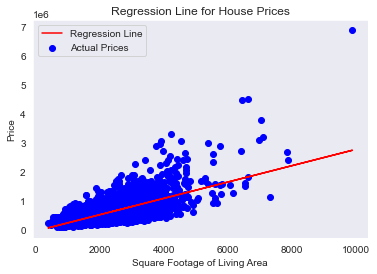

In [50]:
import matplotlib.pyplot as plt

# Plotting the scatter plot of the data points
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')

# Plotting the regression line
plt.plot(X_test, baseline_model.predict(X_test), color='red', label='Regression Line')

# Adding labels and legend
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.title('Regression Line for House Prices')
plt.legend()

# Show plot
plt.show()


#### Multiple Linear Regression

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

def train_test(df, target, test_size=0.20, random_state=42):
    '''
    This function takes in a dataframe df and target column and returns the train and test split
    Default test size is 20, default random state is 42
    '''
    
    # Drop rows with missing values
    df = df.dropna()
    
    # Separating predictors (X) and target (y)
    X = df.drop(target, axis=1)
    y = df[target]
    
    # Creating train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Resetting indices to ensure alignment
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    # Selecting categorical columns
    categorical = X.select_dtypes(include=['object']).columns.tolist()
    
    # Instantiating OneHotEncoder object
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='error', drop='first')
    
    # Fitting and transforming categorical features on train and test sets
    X_train_ohe = ohe.fit_transform(X_train[categorical])
    X_test_ohe = ohe.transform(X_test[categorical])

    # Get feature names for one-hot encoded columns
    feature_names = []
    for cat, categories in zip(categorical, ohe.categories_):
        feature_names.extend([f"{cat}_{val}" for val in categories[1:]])  # Skip the first category
        
    # Placing column names onto new categorical columns and formatting as DataFrame
    X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=feature_names)
    X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=feature_names)
    
    # Combining categoricals with rest of data
    X_train = pd.concat([X_train.select_dtypes(include=['number']), X_train_ohe_df], axis=1)
    X_test = pd.concat([X_test.select_dtypes(include=['number']), X_test_ohe_df], axis=1)

    # List to hold X_train and X_test
    X_list = [X_train, X_test]
    
    # Scaling X values into z-scores
    ss = StandardScaler()
    for i in range(len(X_list)):
        X_list[i] = pd.DataFrame(ss.fit_transform(X_list[i]), columns=X_list[i].columns)
        
    # Unpacking the list
    X_train, X_test = X_list
    return X_train, X_test, y_train, y_test
    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test(output, 'price')

In [ ]:
# Define your actual_vs_predicted function here
def actual_vs_predicted(model, X_test, y_test):
    """
    Plots the actual y vs the predicted y
    """
    y_predicted = model.predict(X_test)
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(x=y_test, y=y_predicted)
    ax.set_xlabel("Actual Price Values")
    ax.set_ylabel("Predicted Price Values")
    ax.set_title("Actual vs Predicted")
    
    p1 = max(max(y_test), max(y_predicted))
    p2 = min(min(y_test), min(y_predicted))
    plt.plot([p1, p2], [p1, p2], 'b-')

# Create linear regression model for price
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Plot actual vs predicted
actual_vs_predicted(model1, X_test, y_test)

In [ ]:
#add constant to X_train
X_train = sm.add_constant(X_train)
#finding OLS for train data set
model1_ols = sm.OLS(y_train, X_train).fit()

In [ ]:
model1_ols.summary()

### Findings


1. **Linear Regression:**
   - The baseline linear regression model predicts house prices based solely on the square footage of living area.
   - The model's performance metrics are as follows:
     - Train RMSE: 261,631.49
     - Test RMSE: 263,524.61
     - Train MSE: 68,451,037,121.75
     - Test MSE: 69,445,217,468.84
     - Train R-squared: 0.498
     - Test R-squared: 0.473
   - The model exhibits moderate performance, with reasonably close predictions to actual prices and a moderate explanatory power, capturing about 49.8% of the variance in house prices.
   - The regression results indicate that each additional square foot of living area is associated with an increase in price of approximately $282.37.
   - However, the presence of strong skewness and kurtosis in the residuals, along with a large condition number, suggests potential issues with the model's assumptions and multicollinearity.

2. **Multiple Linear Regression:**
   - The multiple linear regression model extends the prediction by incorporating additional features besides square footage of living area.
   - The model's performance is similar to the baseline linear regression model, with a comparable R-squared value of 0.498.
   - The regression results confirm that square footage of living area has a significant positive effect on house prices, with an estimated coefficient of approximately 282.37.
   - Again, the large condition number indicates potential issues with multicollinearity or other numerical problems in the model.

 The multiple linear regression model is better than the simple linear regression model because The multiple linear regression model has a slightly higher R-squared value (0.498) compared to the simple linear regression model (0.498 vs. 0.473). A higher R-squared value indicates that the multiple linear regression model explains a larger proportion of the variance in the target variable (house prices) compared to the simple linear regression model.



### Recommendations

1.	Expanding Dataset Variety: Divide the dataset into categories based on property size (small, medium, large) to develop specialized models tailored to different types of properties. Increase dataset diversity by incorporating additional data on various property sizes or from neighboring counties.
2.	Optimizing Property Pricing: Utilize the multiple linear regression model to fine-tune property pricing strategies. Utilize features like square footage, location (zipcode, latitude, longitude), and overall condition (grade, waterfront, view) to accurately evaluate property values and establish competitive yet profitable listing prices.
3.	Focusing on Key Property Attributes: Spotlight and prioritize features that significantly affect property value, such as living space (sqft_living), bedroom and bathroom count, construction quality (grade), and proximity to amenities (waterfront, view). Emphasize these features in marketing materials to attract targeted buyer segments effectively.
4.	Investing in Renovation and Upgrades: Identify properties with potential for value enhancement based on regression coefficients (e.g., sqft_above, sqft_basement). Consider strategic renovations and upgrades to maximize ROI and appeal to discerning buyers.



### Model Improvement

Based on the findings and results from the linear regression and multiple linear regression models, here are some necessary recommendations to improve the predictive accuracy and explanatory power of the models:

1. **Feature Engineering:**
   - Explore additional relevant features that might influence house prices, such as the number of bedrooms, bathrooms, location factors, amenities, and neighborhood characteristics.
   - Conduct thorough data analysis and research to identify potential predictors that have a strong correlation with house prices.

2. **Address Multicollinearity:**
   - Investigate the presence of multicollinearity among the predictor variables, especially in the multiple linear regression model.
   - Use techniques such as variance inflation factor (VIF) analysis to identify and mitigate multicollinearity by removing highly correlated predictors or employing dimensionality reduction techniques.

3. **Model Assumptions:**
   - Validate the assumptions of the regression models, including linearity, homoscedasticity, normality of residuals, and independence of errors.
   - Apply appropriate transformations or adjustments to the data to meet these assumptions if necessary.

4. **Regularization Techniques:**
   - Implement regularization techniques like Ridge regression or Lasso regression to prevent overfitting and improve model generalization, especially in cases of high-dimensional data or multicollinearity.